# Sales Prediction using Advertisement Data

## Overview 
---
**Sales prediction means predicting how much of a product people will buy based on factors**
**such as the amount you spend to advertise your product, the segment of people you**
**advertise for, or the platform you are advertising on about your product.**


### Dataset
---

Shape: 200 rows × 5 columns

Columns:

- Unnamed: 0 → Index (can be dropped)
- TV → Advertising budget spent on TV (in thousands of dollars)
- Radio → Advertising budget spent on Radio
- Newspaper → Advertising budget spent on Newspaper
- Sales → Sales of the product (in thousands of units)


| Column        | Unit / Scale                                                        |
| ------------- | ------------------------------------------------------------------- |
| **TV**        | Advertising budget in **thousands of dollars** (so 195 → \$195,000) |
| **Radio**     | Advertising budget in **thousands of dollars** (so 38.2 → \$38,200) |
| **Newspaper** | Advertising budget in **thousands of dollars** (so 3.7 → \$3,700)   |
| **Sales**     | Product sales in **thousands of units** (so 7.6 → 7,600 units sold) |


In simple words: The dataset shows how much money was spent on TV, Radio, and Newspaper advertising, and how those factors influenced product sales.


## 1. Import Libraries 

In [24]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Models 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
 
# Utils 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics 

## 2. Loading Dataset  

In [26]:
# Dataset 
df = pd.read_csv("Advertising.csv").drop("Unnamed: 0",axis = 1)

# preview 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
# preview 
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


## 3. Data Exploration 
---
- Data Info 
- Statistical Summary 
- Target Distribution
- Feature Distribution 
- Target vs Features Distribution 
- Correlation matrix

In [28]:
# Info
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [29]:
# Statistical Summary 
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


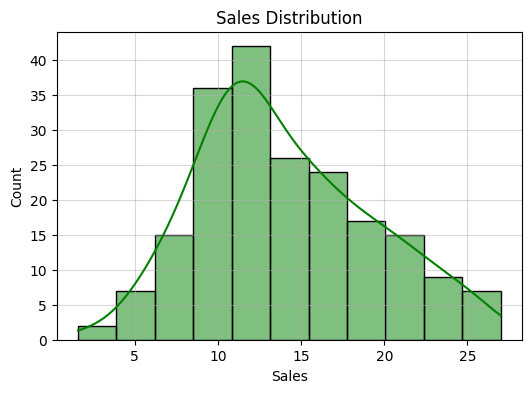

In [30]:
# Target : Sales Distribution Plot
plt.figure(figsize=(6 , 4))
sns.histplot(x = df["Sales"] , color ="green" , fill=True , kde=True)
plt.title("Sales Distribution")
plt.grid(True , alpha = 0.5)
plt.show()

**Findings : Peak value between 10-15k**

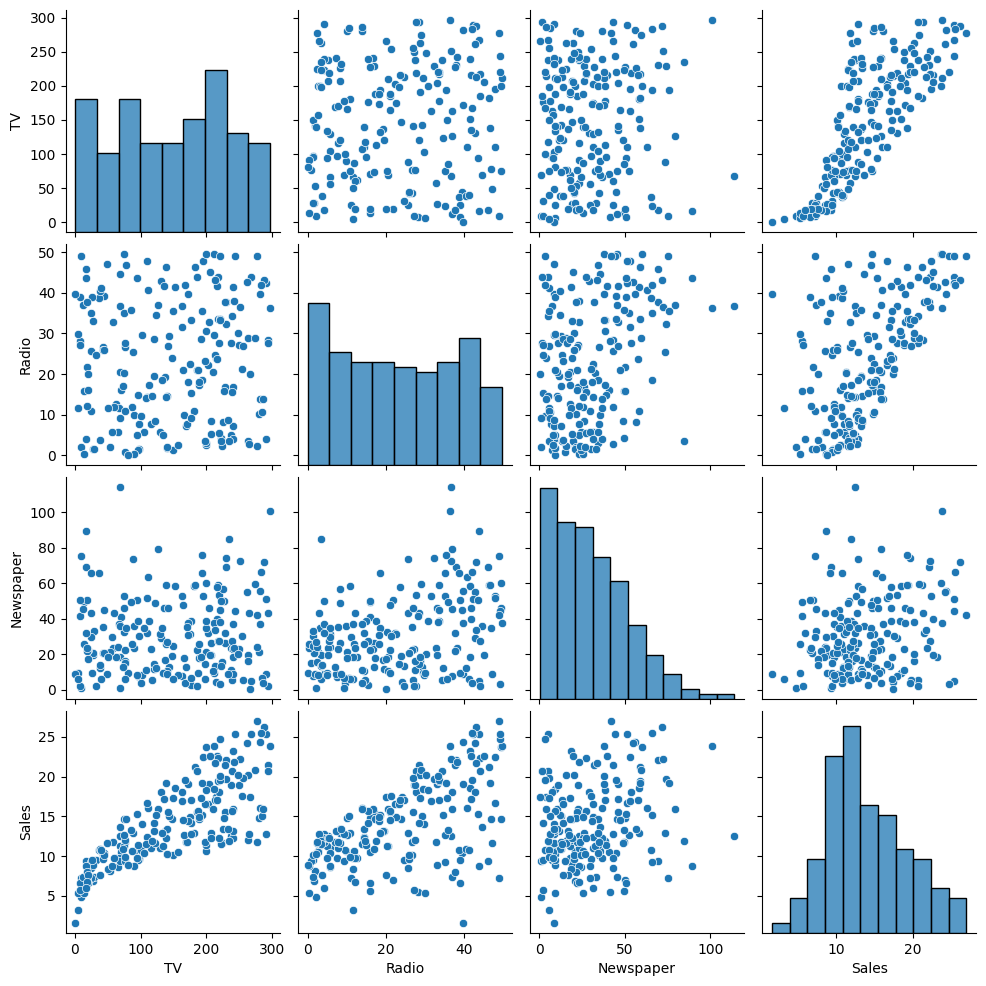

In [31]:
# Spread of data
sns.pairplot(df)
plt.show()

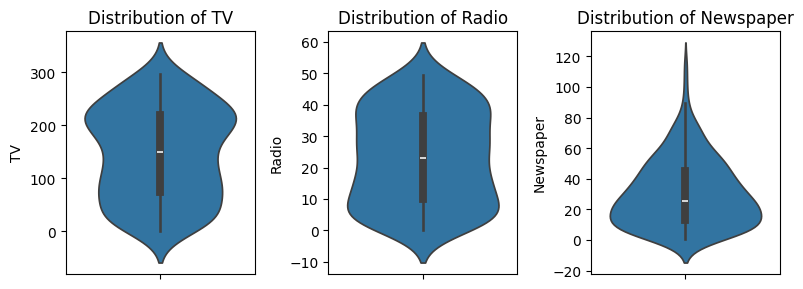

In [32]:
# Features Distribution
plt.figure(figsize=(8, 3)) 
for i , col in enumerate(df.columns[:-1] , 1):
    plt.subplot(1 , 3, i)
    sns.violinplot(df[col] )
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


### Findings: 
- Outliers(**Newspaper**) minimal
#### Distributions : 
- **TV**- Distribution Peak values around 200 & 250
- **Radio**- Distribution Peak values around 10 & 15
- **Newspaper**- Distribution Peak values around 15 & 25

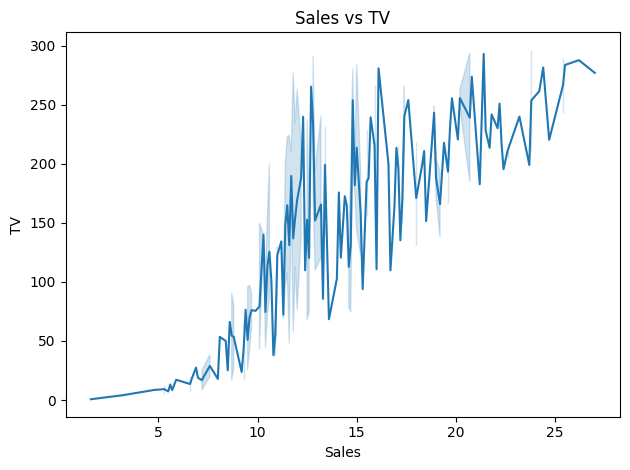

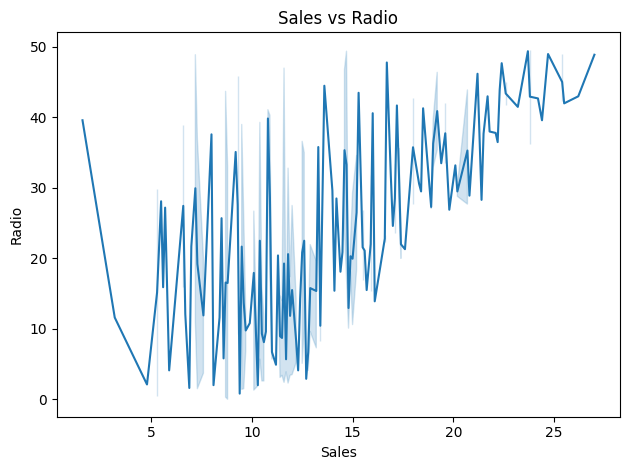

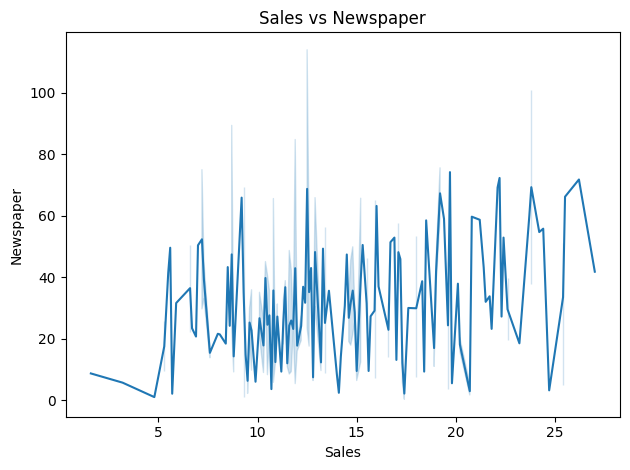

In [33]:
# Lineplot of Distribution of Feature vs Label 
for col in df.columns[:-1]:
    sns.lineplot(x="Sales" , y=col , data = df)
    plt.title(f"Sales vs {col}")
    plt.tight_layout()
    plt.show()


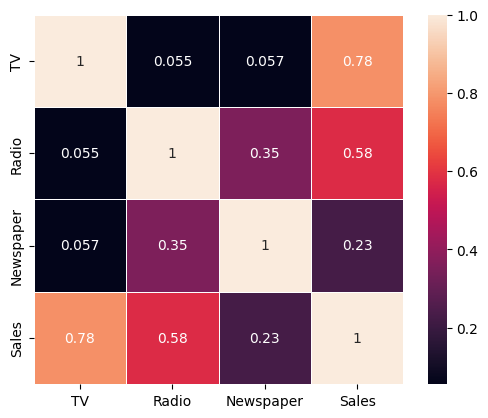

In [38]:
# Correlation matrix 
corr = df.corr()
sns.heatmap(corr , annot=True ,linewidths=0.5 , square=True)
plt.show()

**Findings : All features are mid to higly correlated to the target variable**